## System Setup

In [1]:
# Used for spatial plots
googlemaps_api_token <- getPass()

··········


In [2]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

shell_call("wget https://storage.googleapis.com/torch-lantern-builds/packages/cu117/0.11.0/src/contrib/torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz")
install.packages("torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz", repos = NULL)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
shell_call("grep -m1 'model name' /proc/cpuinfo | awk -F': ' '{printf \" CPU Model: %s \\n \",  $2}'")
shell_call("grep 'cpu cores' /proc/cpuinfo  | awk -F': ' '{a[cores]+=$2}END{printf \"CPU Cores: %s \\n \", a[cores] }'")
shell_call("grep MemTotal /proc/meminfo | awk '{printf \"RAM: %.1fGB \\n \", $2 / 1024 / 1024}'")
shell_call("R --version | head -n 1")

 CPU Model: Intel(R) Xeon(R) CPU @ 2.20GHz 
 CPU Cores: 32 
 RAM: 51.0GB 
 R version 4.3.1 (2023-06-16) -- "Beagle Scouts"

In [4]:
shell_call("nvidia-smi")

Thu Oct 19 09:57:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
library(devtools)
devtools::install_github('julien-hec/BKTR', ref = 'main')

Loading required package: usethis




openssl     (2.0.6 -> 2.1.1  ) [CRAN]
curl        (5.0.2 -> 5.1.0  ) [CRAN]
Rcpp        (NA    -> 1.0.11 ) [CRAN]
sp          (NA    -> 2.1-1  ) [CRAN]
png         (NA    -> 0.1-8  ) [CRAN]
isoband     (0.2.6 -> 0.2.7  ) [CRAN]
bit         (4.0.4 -> 4.0.5  ) [CRAN]
bitops      (NA    -> 1.0-7  ) [CRAN]
jpeg        (NA    -> 0.1-10 ) [CRAN]
plyr        (NA    -> 1.8.9  ) [CRAN]
RgoogleMaps (NA    -> 1.4.5.3) [CRAN]
collections (NA    -> 0.3.7  ) [CRAN]
coro        (NA    -> 1.0.3  ) [CRAN]
ggmap       (NA    -> 3.0.2  ) [CRAN]
R6P         (NA    -> 0.3.0  ) [CRAN]


Installing 15 packages: openssl, curl, Rcpp, sp, png, isoband, bit, bitops, jpeg, plyr, RgoogleMaps, collections, coro, ggmap, R6P

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpBos60V/remotes2952d806764/julien-hec-BKTR-943c2e8/DESCRIPTION’ ... OK
* preparing ‘BKTR’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘BKTR_0.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## BIXI Example (Section 6)

### Analysis (6.1)

In [6]:
library(BKTR)

TSR$set_params(seed = 1, fp_type = 'float32', fp_device = 'cuda')
bixi_data <- BixiData$new()

p_lgth <- KernelParameter$new(value = 7, is_fixed = TRUE)
k_local_periodic <- KernelSE$new() * KernelPeriodic$new(period_length = p_lgth)
bktr_regressor <- BKTRRegressor$new(
  formula = nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm,
  data_df = bixi_data$data_df,
  spatial_positions_df = bixi_data$spatial_positions_df,
  temporal_positions_df = bixi_data$temporal_positions_df,
  rank = 8,
  spatial_kernel = KernelMatern$new(smoothness_factor = 5),
  temporal_kernel = k_local_periodic,
  burn_in_iter = 1000,
  sampling_iter = 500)
bktr_regressor$mcmc_sampling()

[1] "Iter 1     | Elapsed Time:     1.99s | MAE:  0.0941 | RMSE:  0.1289"
[1] "Iter 2     | Elapsed Time:     0.22s | MAE:  0.0656 | RMSE:  0.0891"
[1] "Iter 3     | Elapsed Time:     0.46s | MAE:  0.0588 | RMSE:  0.0799"
[1] "Iter 4     | Elapsed Time:     0.29s | MAE:  0.0568 | RMSE:  0.0771"
[1] "Iter 5     | Elapsed Time:     0.49s | MAE:  0.0561 | RMSE:  0.0762"
[1] "Iter 6     | Elapsed Time:     0.19s | MAE:  0.0561 | RMSE:  0.0761"
[1] "Iter 7     | Elapsed Time:     0.75s | MAE:  0.0558 | RMSE:  0.0757"
[1] "Iter 8     | Elapsed Time:     1.29s | MAE:  0.0555 | RMSE:  0.0754"
[1] "Iter 9     | Elapsed Time:     0.35s | MAE:  0.0557 | RMSE:  0.0754"
[1] "Iter 10    | Elapsed Time:     0.63s | MAE:  0.0554 | RMSE:  0.0752"
[1] "Iter 11    | Elapsed Time:     0.37s | MAE:  0.0554 | RMSE:  0.0751"
[1] "Iter 12    | Elapsed Time:     0.34s | MAE:  0.0553 | RMSE:  0.0749"
[1] "Iter 13    | Elapsed Time:     0.71s | MAE:  0.0552 | RMSE:  0.0748"
[1] "Iter 14    | Elapsed Time:     2.

In [7]:
summary(bktr_regressor)


                        BKTR Regressor Summary                        
Formula: nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm

Burn-in iterations: 1000
Sampling iterations: 500
Rank decomposition: 8
Nb Spatial Locations: 587
Nb Temporal Points: 196
Nb Covariates: 4
In Sample Errors:
  RMSE: 0.072
  MAE: 0.053
Computation time: 1353.32s.
-- Spatial Kernel --
Matern 5/2 Kernel
Parameter(s):
                       Mean   Median       SD  Low2.5p  Up97.5p
lengthscale          21.128   20.877    1.401   18.658   23.738

-- Temporal Kernel --
Composed Kernel (Mul)
  SE Kernel
  Parameter(s):
                         Mean   Median       SD  Low2.5p  Up97.5p
  lengthscale           6.448    6.437    0.114    6.252    6.685
  *
  Periodic Kernel
  Parameter(s):
                         Mean   Median       SD  Low2.5p  Up97.5p
  lengthscale           0.941    0.942    0.020    0.899    0.979
  period length          Fixed Value: 7.000
Beta Estimates Summary (Aggregated Per Covari

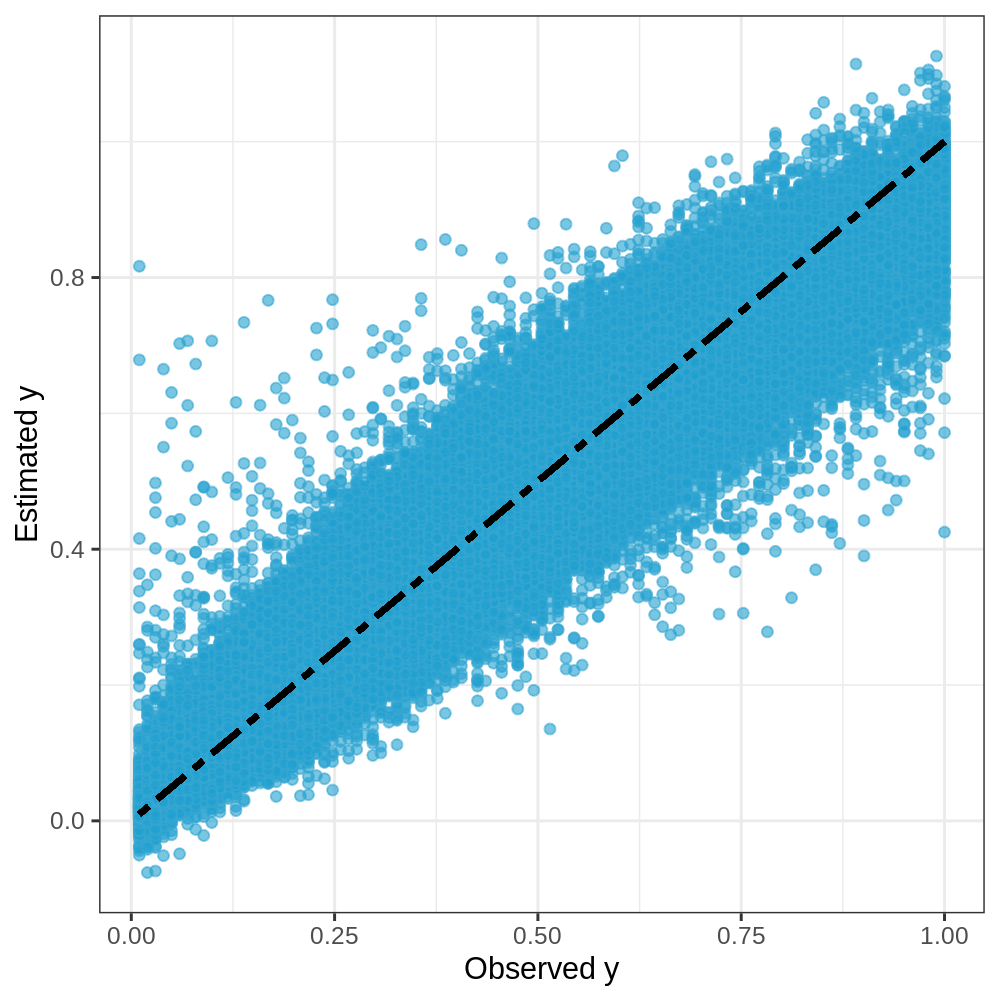

In [8]:
plot_y_estimates(bktr_regressor, fig_title=NULL)

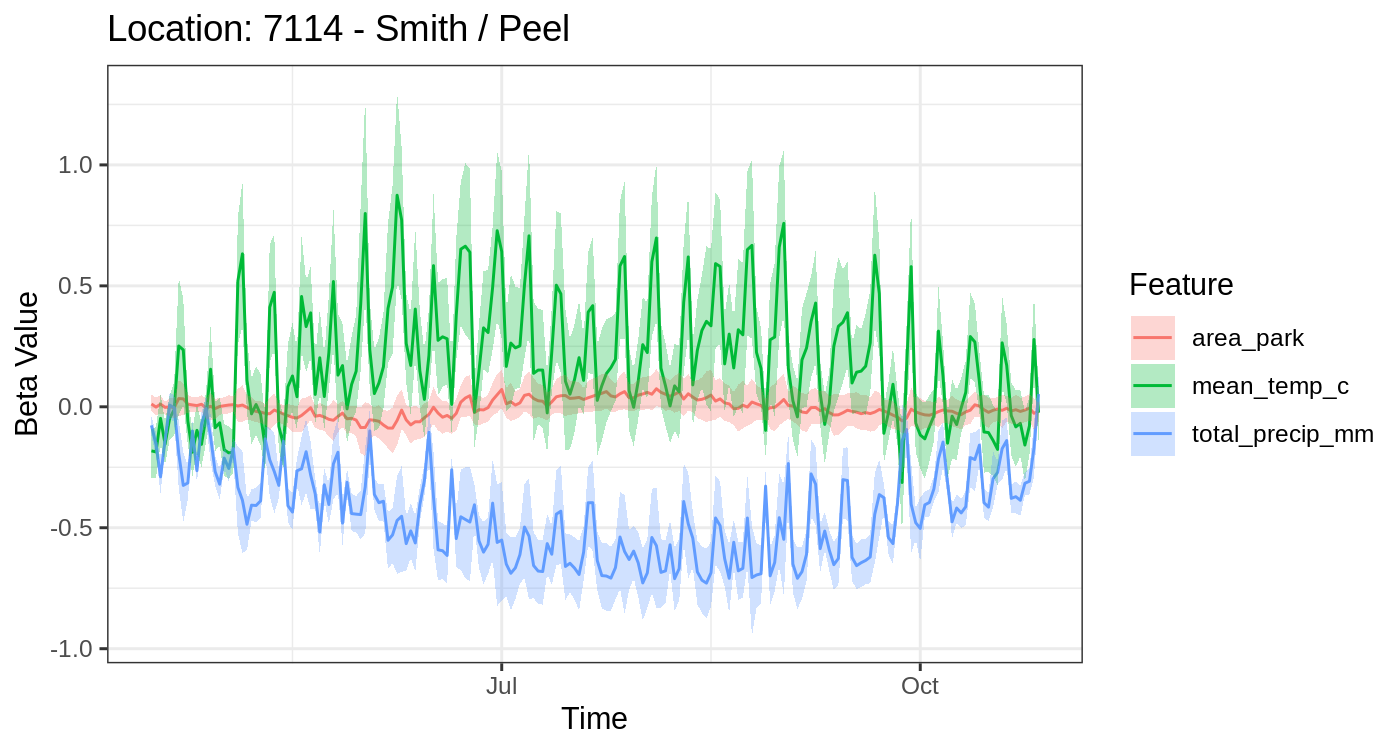

In [9]:
plot_temporal_betas(
    bktr_regressor,
    plot_feature_labels = c('mean_temp_c', 'area_park', 'total_precip_mm'),
    spatial_point_label = '7114 - Smith / Peel',
    fig_width = 7, fig_height=3.75
    )

ℹ <https://maps.googleapis.com/maps/api/staticmap?center=45.507278,-73.596815&zoom=11&size=640x640&scale=2&maptype=roadmap&language=en-EN&key=xxx>



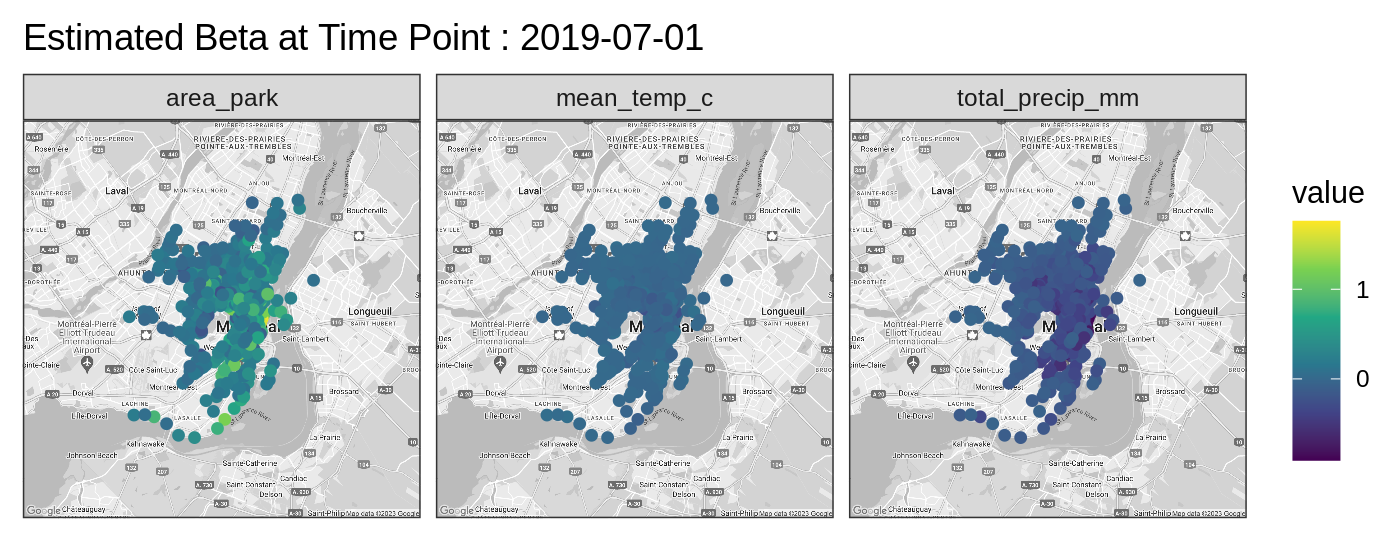

In [10]:
plot_spatial_betas(
    bktr_regressor,
    plot_feature_labels = c('mean_temp_c', 'area_park', 'total_precip_mm'),
    temporal_point_label = '2019-07-01',
    nb_cols = 3,
    fig_width = 7, fig_height=2.75,
    google_token = googlemaps_api_token)

### Imputation (6.2)

In [11]:
y_is_na <- is.na(bixi_data$data_df$nb_departure)
nb_y_na <- sum(y_is_na)
sprintf(
  'There is %.d missing `nb_departure` values representing ~%.2f%%',
  nb_y_na,
  nb_y_na / length(y_is_na) * 100)

print(bixi_data$data_df[which(y_is_na)[1:3], 1:3])

print(bktr_regressor$imputed_y_estimates[which(y_is_na)[1:3]])

[1] "There is 14940 missing `nb_departure` values representing ~12.99%"

                                         location       time nb_departure
1: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-04-22           NA
2: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-05-08           NA
3: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-05-16           NA
                                         location       time     y_est
1: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-04-22 0.7535655
2: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-05-08 1.0123121
3: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-05-16 1.0687331


### Interpolation (6.3)

In [12]:
library(data.table)
library(ggplot2)

TSR$set_params(seed=0, fp_type='float32', fp_device='cuda')
bixi_data <- BixiData$new()
data_df <- bixi_data$data_df
spa_df <- bixi_data$spatial_positions_df
tem_df <- bixi_data$temporal_positions_df

# Separate data in old vs new batches
new_s = c(
  '4002 - Graham / Wicksteed',
  '7079 - Notre-Dame / Gauvin',
  '6236 - Laurier / de Bordeaux'
)
new_t <- c('2019-05-01', '2019-05-02')
new_t <- as.IDate(new_t)
# Get obs data
obs_s = setdiff(unlist(spa_df$location), new_s)
obs_t = as.IDate(setdiff(unlist(tem_df$time), new_t))

obs_data_df <- data_df[data_df[, .I[
  location %in% obs_s & time %in% obs_t]], ]
obs_spa_df <- spa_df[spa_df[, .I[location %in% obs_s]], ]
obs_tem_df <- tem_df[tem_df[,.I[time %in% obs_t]], ]
# Get new data
new_data_df <- data_df[data_df[, .I[
  location %in% new_s | time %in% new_t]], ]
new_spa_df <- spa_df[spa_df[, .I[location %in% new_s]], ]
new_tem_df <- tem_df[tem_df[, .I[time %in% new_t]], ]

bktr_regressor <- BKTRRegressor$new(
  data_df = obs_data_df,
  spatial_positions_df = obs_spa_df,
  temporal_positions_df = obs_tem_df,
  #... other parameters like section 6.1
  formula = nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm,
  rank = 8,
  spatial_kernel = KernelMatern$new(smoothness_factor = 5),
  temporal_kernel = (
    KernelSE$new() *
      KernelPeriodic$new(period_length = KernelParameter$new(value = 7, is_fixed = TRUE))
  ),
  burn_in_iter = 1000,
  sampling_iter = 500)
bktr_regressor$mcmc_sampling()

[1] "Iter 1     | Elapsed Time:     0.29s | MAE:  0.1027 | RMSE:  0.1405"
[1] "Iter 2     | Elapsed Time:     0.18s | MAE:  0.0653 | RMSE:  0.0886"
[1] "Iter 3     | Elapsed Time:     0.48s | MAE:  0.0595 | RMSE:  0.0811"
[1] "Iter 4     | Elapsed Time:     0.52s | MAE:  0.0583 | RMSE:  0.0794"
[1] "Iter 5     | Elapsed Time:     0.51s | MAE:  0.0574 | RMSE:  0.0781"
[1] "Iter 6     | Elapsed Time:     0.75s | MAE:  0.0567 | RMSE:  0.0770"
[1] "Iter 7     | Elapsed Time:     0.47s | MAE:  0.0565 | RMSE:  0.0766"
[1] "Iter 8     | Elapsed Time:     0.45s | MAE:  0.0562 | RMSE:  0.0763"
[1] "Iter 9     | Elapsed Time:     0.60s | MAE:  0.0561 | RMSE:  0.0760"
[1] "Iter 10    | Elapsed Time:     1.52s | MAE:  0.0559 | RMSE:  0.0759"
[1] "Iter 11    | Elapsed Time:     0.83s | MAE:  0.0559 | RMSE:  0.0758"
[1] "Iter 12    | Elapsed Time:     0.66s | MAE:  0.0559 | RMSE:  0.0758"
[1] "Iter 13    | Elapsed Time:     0.76s | MAE:  0.0558 | RMSE:  0.0757"
[1] "Iter 14    | Elapsed Time:     0.

In [13]:
# Prediction on unobserved data
preds <- bktr_regressor$predict(
  new_data_df,
  new_spa_df,
  new_tem_df
)
new_data_df <- data_df[data_df[, .I[location %in% new_s | time %in% new_t]], c('location', 'time', 'nb_departure')]
pred_y_df <- preds$new_y_df
# Sort data for comparison and remove na values
setkey(new_data_df, location, time)
setkey(pred_y_df, location, time)
non_na_indices <- which(!is.na(new_data_df$nb_departure))

y_err <- new_data_df$nb_departure[non_na_indices] - pred_y_df$y_est[non_na_indices]
sprintf('Predicting %d y values || MAE: %.4f || RMSE: %.4f',
        length(non_na_indices), mean(abs(y_err)), sqrt(mean(y_err ^ 2)))

[1] "Predicting 1664 y values || MAE: 0.0878 || RMSE: 0.1278"

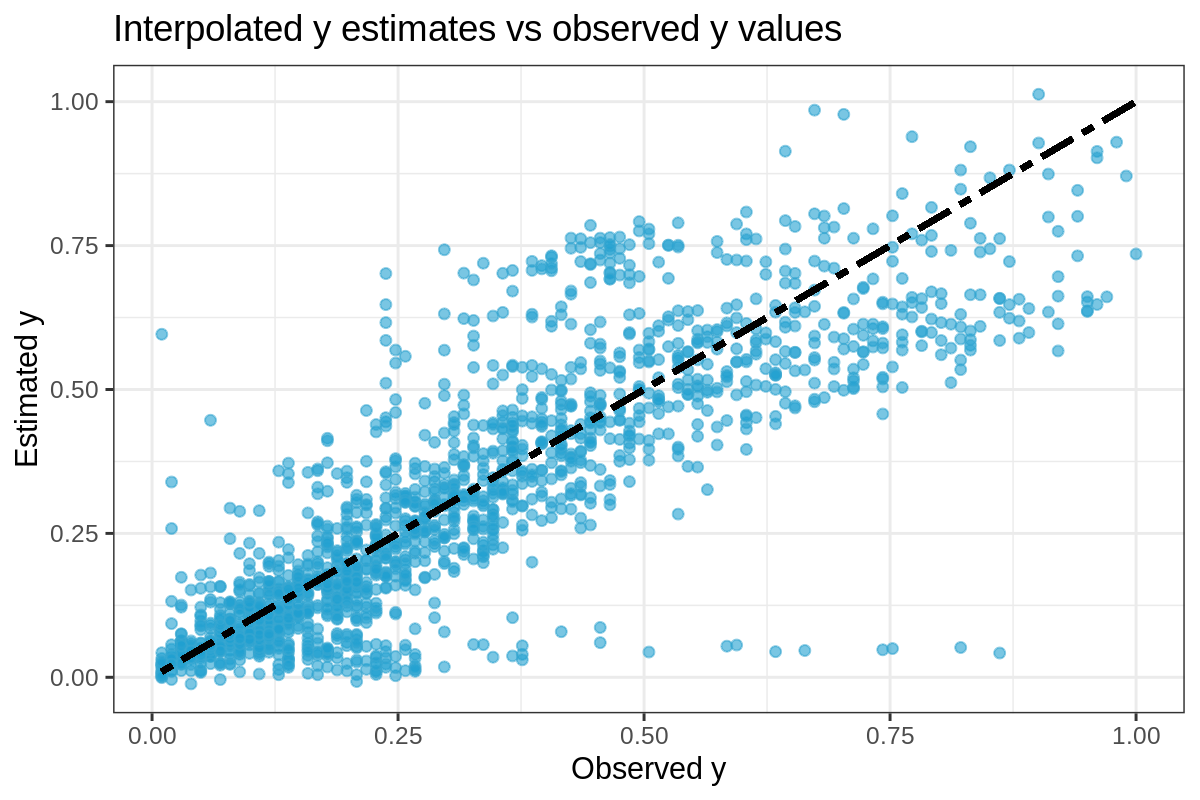

In [15]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)

# Plot y predicted vs y observed
y_list <- new_data_df$nb_departure[non_na_indices]
y_est_list <- pred_y_df$y_est[non_na_indices]
min_y <- min(y_list)
max_y <- max(y_list)
df <- data.table(y = y_list, y_est = y_est_list)
fig <- (
    ggplot(df, aes(x = .data$y, y = .data$y_est))
    + geom_point(color = '#39a7d0', alpha = 0.6, shape = 21, fill = '#20a0d0')
    + geom_segment(aes(x = min_y, y = min_y, xend = max_y, yend = max_y), color = 'black',
                    linetype = 'twodash', linewidth = 1)
    + theme_bw()
    + ylab('Estimated y')
    + xlab('Observed y')
    + ggtitle('Interpolated y estimates vs observed y values')
)
print(fig)